In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Introduction to Un-supervised learning -- Clustering

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention(IBM). It is the good option for exploratory data analysis, cross-selling tactics, consumer segmentation, and picture identification because of its capacity to find similarities and differences in information.

In this section, we will focus on 3 different clustering methods to do the clustering analysis. The data set can be found on My Github called [Drug_Consumption.csv](https://github.com/anly501/anly-501-project-yanyanli0/tree/main/data/01-modified-data) and can be download [here](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#). The dataset has 1884 rows and 32 columns and each row represents the information about a participant. We will use the 6 columns ('Age','Gender','Nscore','Escore','Cannabis','Country') and 1884 rows for the clustering analysis. 

**Attribute Information**
<br>
**Age** is age of a participant has one value from the list {'55-64', '18-24', '45-54', '25-34', '65+', '35-44'} 
<br>
**Gender** is gender of participant: Female or Male
<br>
**Country** is country of current residence of participant has one value from the list {'USA', 'Republic of Ireland', 'New Zealand', 'UK', 'Canada', 'Other', 'Australia'}
<br>
**Nscore** is NEO-FFI-R Neuroticism and is a numerical value. People who score high in neuroticism are very emotionally reactive. 
<br>
**Escore** is NEO-FFI-R Extraversion and is a numerical value. Extraversion indicates how outgoing and social a person is.
<br>
**Cannabis** is class of cannabis consumption. It is output attribute with following distribution of classes. 
{'CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'} where
<br>
CL0 represents Never Used;
<br>
CL1 represents Used over a Decade Ago;
<br>
CL2 represents Used in Last Decade;
<br>
CL3 represents Used in Last Year; 
<br>
CL4 represents Used in Last Month;
<br>
CL5 represents Used in Last Week;
<br>
CL6 represents Used in Last Day;


So, based on these select features, we will use all the columns except the 'Cannabis' to divide the data into different groups. Then compare the group labels we get from unsupervised machine learning with the 'Cannabis' group labels and check if the clustering predictions coincided with the 'Cannabis' group labels.

## Data Selection

Choose the target columns which are 'Age', 'Gender', 'Nscore', 'Escore','Cannabis','Country'

In [2]:
df=pd.read_csv("Drug_Consumption.csv")
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Entire dataset (1884 rows × 32 columns)

In [3]:
df=df[['Age', 'Gender', 'Nscore', 'Escore','Cannabis','Country']]
df

,Age,Gender,Nscore,Escore,Cannabis,Country
0,25-34,M,-0.67825,1.93886,CL4,UK
1,35-44,M,-0.46725,0.80523,CL3,UK
2,18-24,F,-0.14882,-0.80615,CL2,UK
3,35-44,F,0.73545,-1.63340,CL3,UK
4,65+,F,-0.67825,-0.30033,CL0,Canada
...,...,...,...,...,...,...
1879,18-24,F,-1.19430,1.74091,CL5,USA
1880,18-24,M,-0.24649,1.74091,CL3,USA
1881,25-34,F,1.13281,-1.37639,CL6,USA
1882,18-24,F,0.91093,-1.92173,CL6,USA


Selected dataset (1884 rows × 6 columns)

# Data Preparation

<li>Replace the values in Column 'Age' with it median </li>
<br>
For example, the first row has '25-34' in Age column and it will be replaced with 29.5

In [4]:
df=df.replace('18-24', 21)
df=df.replace('25-34', 29.5)
df=df.replace('55-64', 59.5)
df=df.replace('45-54', 49.5)
df=df.replace('35-44', 39.5)
df=df.replace('65+', 65)

In [5]:
df.head()

,Age,Gender,Nscore,Escore,Cannabis,Country
0,29.5,M,-0.67825,1.93886,CL4,UK
1,39.5,M,-0.46725,0.80523,CL3,UK
2,21.0,F,-0.14882,-0.80615,CL2,UK
3,39.5,F,0.73545,-1.63340,CL3,UK
4,65.0,F,-0.67825,-0.30033,CL0,Canada


<li>Replace the categorical values in Cannabis with category codes </li>

In [6]:
print(dict(enumerate(df['Cannabis'].astype('category').cat.categories)))
df['Cannabis']=df['Cannabis'].astype('category').cat.codes
df.head()


{0: 'CL0', 1: 'CL1', 2: 'CL2', 3: 'CL3', 4: 'CL4', 5: 'CL5', 6: 'CL6'}


,Age,Gender,Nscore,Escore,Cannabis,Country
0,29.5,M,-0.67825,1.93886,4,UK
1,39.5,M,-0.46725,0.80523,3,UK
2,21.0,F,-0.14882,-0.80615,2,UK
3,39.5,F,0.73545,-1.63340,3,UK
4,65.0,F,-0.67825,-0.30033,0,Canada


<li>Replace the categorical values in Gender with 1 indicating male and 0 indicating female </li>

In [7]:
print(dict(enumerate(df['Gender'].astype('category').cat.categories)))
df['Gender']=df['Gender'].astype('category').cat.codes
df.head()

{0: 'F', 1: 'M'}


,Age,Gender,Nscore,Escore,Cannabis,Country
0,29.5,1,-0.67825,1.93886,4,UK
1,39.5,1,-0.46725,0.80523,3,UK
2,21.0,0,-0.14882,-0.80615,2,UK
3,39.5,0,0.73545,-1.63340,3,UK
4,65.0,0,-0.67825,-0.30033,0,Canada


<li>Replace the categorical values in Country </li>

In [8]:
print(dict(enumerate(df['Country'].astype('category').cat.categories)))
df['Country']=df['Country'].astype('category').cat.codes
df.head()

{0: 'Australia', 1: 'Canada', 2: 'New Zealand', 3: 'Other', 4: 'Republic of Ireland', 5: 'UK', 6: 'USA'}


,Age,Gender,Nscore,Escore,Cannabis,Country
0,29.5,1,-0.67825,1.93886,4,5
1,39.5,1,-0.46725,0.80523,3,5
2,21.0,0,-0.14882,-0.80615,2,5
3,39.5,0,0.73545,-1.63340,3,5
4,65.0,0,-0.67825,-0.30033,0,1


<li>Normalize the numerical data</li>

In [9]:
X=df.drop(['Cannabis'],axis=1)
y=df['Cannabis']
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)


In [10]:
pd.DataFrame(X,columns=['Age','Gender','Nscore','Escore','Country']).head()

,Age,Gender,Nscore,Escore,Country
0,-0.323689,0.998939,-0.679435,1.943848,0.12445
1,0.501130,0.998939,-0.468029,0.807218,0.12445
2,-1.024784,-1.001062,-0.148987,-0.808426,0.12445
3,0.501130,-1.001062,0.736985,-1.637866,0.12445
4,2.604416,-1.001062,-0.679435,-0.301268,-2.70042


# K Means Clustering

K-means is a centroid-based clustering technique where each data point is assigned to a cluster based on the distance between it and a centroid. Finding the K number of groups in the dataset is the objective.

Now, we are going to use two methods called Elbow method and Silhouette method to find the ideal number of K.

Elbow method contains two measurement one is distortions and another one is inertias. Both of them measure how far the data point is from the centroid of assigned the cluster. We are going to plot distortions/inertias vs Number of Clustering, and our goal is to pick the elbow of the curve as the number of clusters to use.

Silhouette method is to calculate the Silhouette score with different number of cluster. Since, Silhouette score is used to evaluate the quality of clusters created. So, our goal for this method is to find the Number of clusters with highest Silhouette score.


In [11]:
import sklearn.cluster
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

In [12]:
%matplotlib inline
NDIM =5
def plot(title=''):
	if(NDIM==2):
		fig, ax = plt.subplots()
		sp=ax.scatter(X[:,0], X[:,1],c=labels,marker=".", cmap="viridis")
		plt.colorbar(sp)

	if(NDIM==3):
		fig = plt.figure()
		ax = fig.add_subplot(projection='3d')
		sp=ax.scatter(X[:,0],X[:,1],X[:,2],c=labels,marker=".", cmap="viridis")
		plt.colorbar(sp)

	#DO PCA TO VISUALIZE
	if(NDIM>3):
		from sklearn.decomposition import PCA
		pca = PCA(n_components=3)
		pca.fit(X)
		Y=pca.fit_transform(X)
		fig = plt.figure()
		ax = fig.add_subplot(projection='3d')
		sp=ax.scatter(Y[:,0],Y[:,1],Y[:,2],c=labels,marker=".", cmap="viridis")
		plt.colorbar(sp)
	plt.title(title)
	plt.show()



In [13]:
distortions = []
inertias = []


K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  

elbow=pd.DataFrame({'Cluster':K,'Distortion':distortions,'Inertia':inertias})   



OPTIMAL PARAMETER = 8


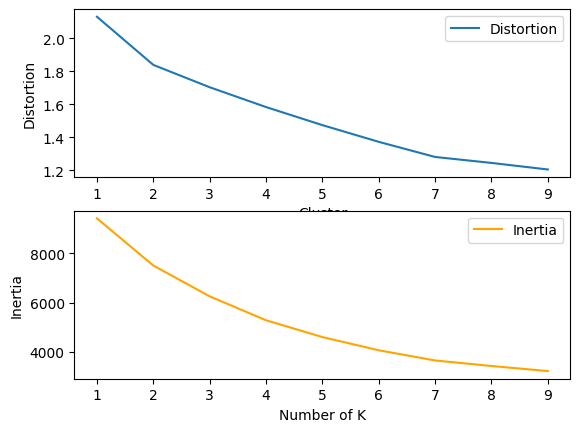

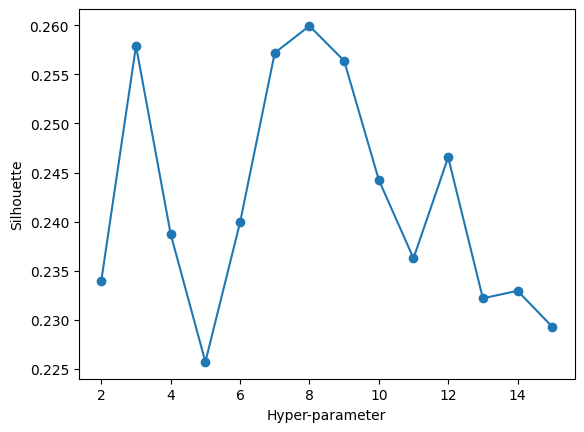

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)

sns.lineplot(x=elbow['Cluster'],y=elbow['Distortion'],ax=ax[0],palette = 'green', label="Distortion")

sns.lineplot(x=elbow['Cluster'],y=elbow['Inertia'],ax=ax[1],color='orange', label="Inertia")

plt.xlabel("Number of K")

plt.legend()

opt_labels=maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)

From the two graphs above, we can see the highest Silhouette score is around 0.257 when the cluster size is 8.

## Optimal K means

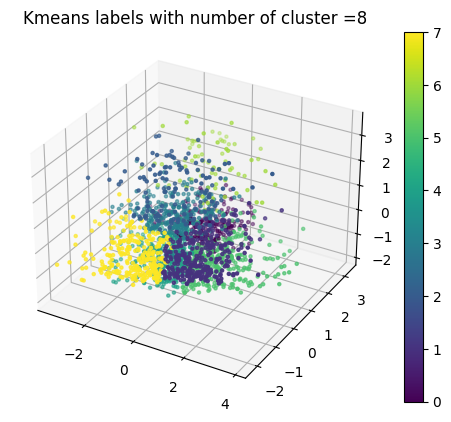

In [15]:
%matplotlib inline

Kmean = KMeans(n_clusters=8).fit(X)

df['label_kmean']=Kmean.fit_predict(X)

labels=df['label_kmean']

plot(title='Kmeans labels with number of cluster ='+str(8))


# DBSAN Clustering

It creates a cluster from "densely organized" data points. By examining the local density of the data points, it may locate clusters in big geographical datasets. The sensitivity to outliers of DBSCAN clustering is its most exciting characteristic. Additionally, unlike K-Means, which requires us to specify the number of centroids, it does not require us to know in advance how many clusters will be present (Sharma). Besides, the DBSAN Clustering only have two parameters epsilon and mini sample size. The epsilon represents the radius of the circle centered at the each data point and mini sample size represents the minimum number of data points required in the circle.

So, in this section, we will find the best optimal epsilon and mini sample size then apply DBSCAN clustering on the dataset and visualize the result. 



## Optimal Epsilon

OPTIMAL PARAMETER = 2.0


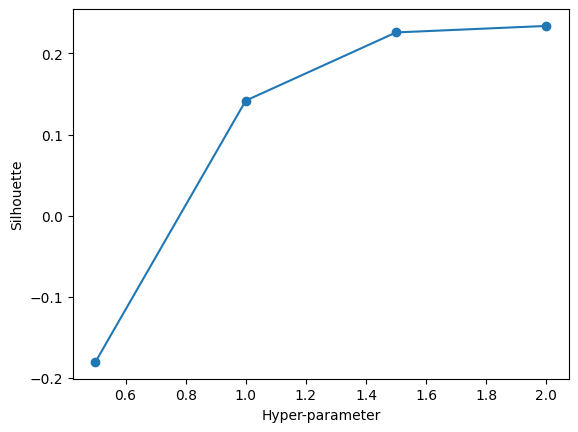

In [16]:
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)

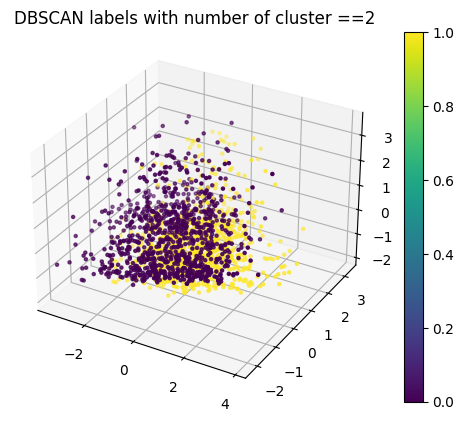

In [17]:

fig.set_size_inches(14,8)
db = DBSCAN(eps=2,min_samples=20).fit(X)

df['label_db']=db.fit_predict(X)
labels=df['label_db']

plot(title='DBSCAN labels with number of cluster =='+str(2))

# Agglomerative Clustering (Hierarchical clustering)

Agglomerative Clustering is also called Hierarchical clustering. It is one of the unsupervised machine learning methods that can divide the data into different groups based on the similarity of each data. So, the data in the same cluster have similar feature and data in different cluster are less similar.

The Agglomerative Clustering method only require one parameter which is number of cluster. We will find the optimal cluster size dendrogram method and visualize the optimal result

## Dendrogram

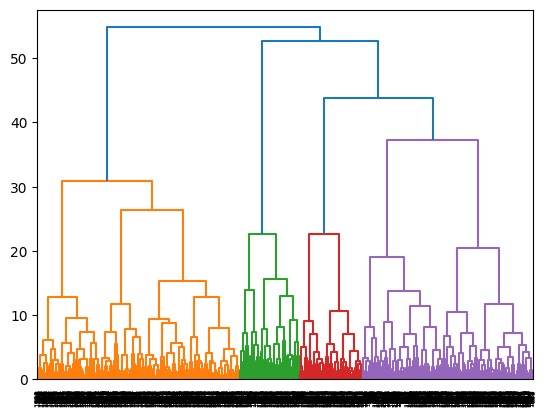

In [18]:
from scipy.cluster.hierarchy import dendrogram

Agg= AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(Agg, truncate_mode="level")

OPTIMAL PARAMETER = 3


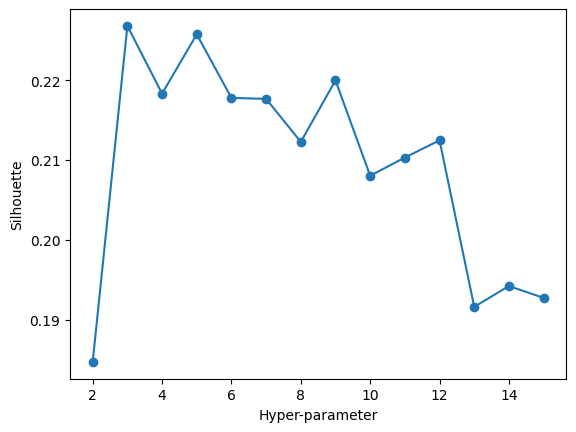

In [19]:
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)

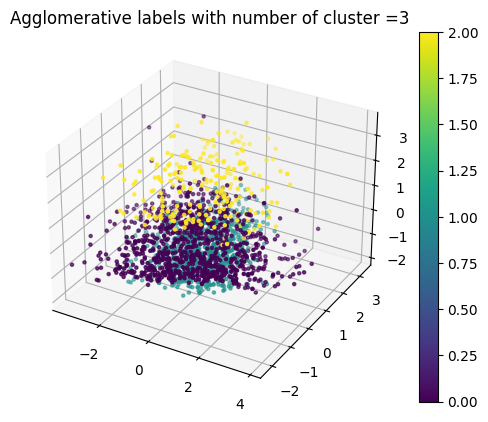

In [20]:

fig.set_size_inches(14,8)
Agg = AgglomerativeClustering(n_clusters=3).fit(X)

df['label_agg']=Agg.fit_predict(X)


labels=df['label_agg']

plot(title='Agglomerative labels with number of cluster ='+str(3))

# Result
Let's plot the data based on the and put all four graphs together and compare them with the data labeled by 'Cannabis'


<img src="kmeans.png" alt="drawing" width="340"/>

<img src="DBSCAN.png" alt="drawing" width="350"/>

<img src="Agg.png" alt="drawing" width="355"/>

<img src="normal.png" alt="drawing" width="340"/>


From the four graphs above, we can clearly see that different methods divide the data into different size of clusters. K means has 8 clusters, dbscan only have 2 clusters and the agglomerative has 3 clusters.

All of the results don’t match the Cannabis labels in the dataset. The K means cluster has the most different cluster sizes.

Let's visualize the data points into 2D and see what we can discover

In [47]:
df.columns

Index(['Age', 'Gender', 'Nscore', 'Escore', 'Cannabis', 'Country',
       'label_kmean', 'label_db', 'label_agg'],
      dtype='object')

Text(0.5, 1.0, 'Escore vs Country')

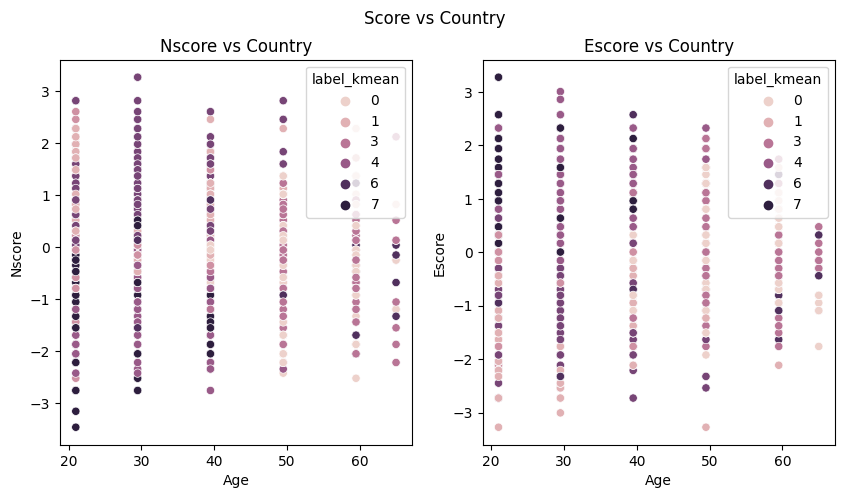

In [53]:
%matplotlib inline
fig,ax= plt.subplots(1, 2,sharex=True, figsize=(10,5))
fig.suptitle('Score vs Country')
sns.scatterplot(data=df,x='Age',y='Nscore',hue='label_kmean',ax=ax[0])
sns.scatterplot(data=df,x='Age',y='Escore',hue='label_kmean',ax=ax[1])
ax[0].set_title('Nscore vs Country')
ax[1].set_title('Escore vs Country')

## Agglomerative Clustering in 2D

Text(0.5, 1.0, 'Escore vs Country')

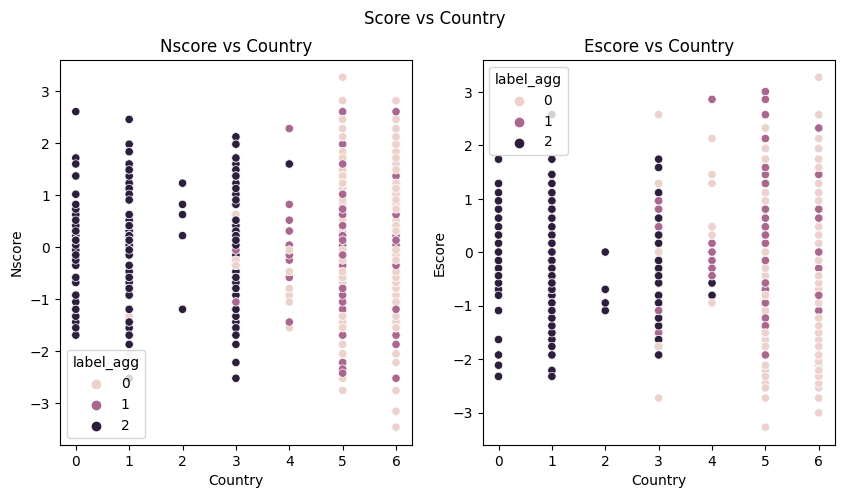

In [22]:
fig,ax= plt.subplots(1, 2,sharex=True, figsize=(10,5))
fig.suptitle('Score vs Country')
sns.scatterplot(data=df,x='Country',y='Nscore',hue='label_agg',ax=ax[0])
sns.scatterplot(data=df,x='Country',y='Escore',hue='label_agg',ax=ax[1])
ax[0].set_title('Nscore vs Country')
ax[1].set_title('Escore vs Country')

From the graph, we can tell that the almost all the black points are located on Country 0 to 3 and rest the points are coming from Country 3 to 6. And the range of Nscore of black points is around -2.5 to 2 and same for the Escore.

## DBSCAN Clustering in 2D

Text(0.5, 1.0, 'Escore vs Gender')

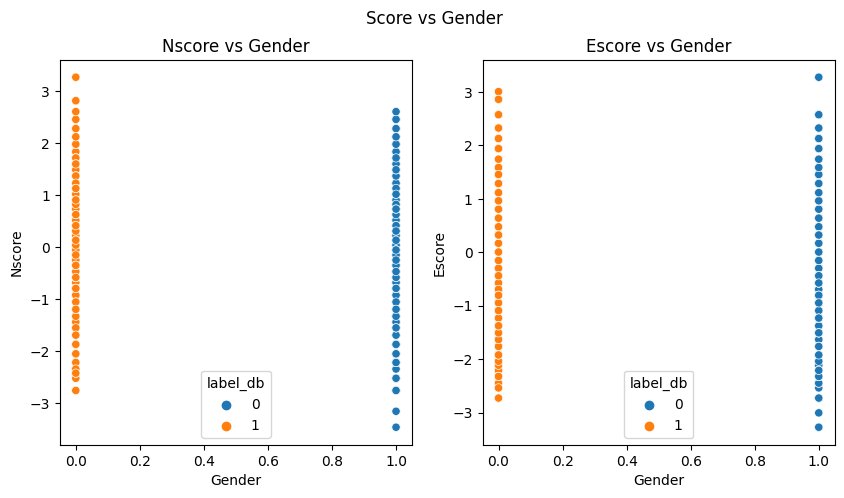

In [23]:
fig,ax= plt.subplots(1, 2,sharex=True, figsize=(10,5))
fig.suptitle('Score vs Gender')
sns.scatterplot(data=df,x='Gender',y='Nscore',hue='label_db',ax=ax[0])
sns.scatterplot(data=df,x='Gender',y='Escore',hue='label_db',ax=ax[1])
ax[0].set_title('Nscore vs Gender')
ax[1].set_title('Escore vs Gender')

From above graphs, we can see the DBSCAN method divide all the data points into two groups based on their gender-- Female(0) and Male(1). From the left hand side graph, we can see the more orange group sightly higher than the blue points group. Since the organ group is Gender 0 which represents female, we can tell the average Nscore of female is higher than male's. Similarly, for the right hand side graph, we can see more orange points are concentrated on -3 to 3 and blue points are concentrated on -3 to 2.5. So, the average female Escore are higher than male's as well.

# Conclusion

Overall, different clustering methods will divide the dataset into different group based on different standard or data similarity. For example, we can clearly see the DBSCAN clustering has perfect two gender clusters and other method dont have more than two groups. So, I think it is useful to apply multiple clustering on the same dataset to find their features in different ways.

What I found in DBSCAN clustering is the average Nscore/Escore of female is higher than male's, which shows that female are more emotionally reactive than male. From the Wikipedia, research has suggested that women express emotions more frequently than men on average. Multiple researchers have found that women cry more frequently, and for longer durations than men at similar ages. This view is completely consistent with our results .

In the end, since these three methods didnt predicts the same labels as Cannabis, I think there are might be other key features that need to be consider.

# Reference

IBM Cloud Education. (n.d.). What is unsupervised learning? IBM. Retrieved November 6, 2022, from https://www.ibm.com/cloud/learn/unsupervised-learning#:~:text=Unsupervised%20learning%2C%20also%20known%20as,the%20need%20for%20human%20intervention. 

Sharma, A. (2022, June 20). How does DBSCAN clustering work?: DBSCAN clustering for ML. Analytics Vidhya. Retrieved November 10, 2022, from https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/ 

Wikimedia Foundation. (2022, August 20). Gender and emotional expression. Wikipedia. Retrieved November 11, 2022, from https://en.wikipedia.org/wiki/Gender_and_emotional_expression 